# Analyse reads 
### Wiki/[GC content](https://en.wikipedia.org/wiki/GC-content)


In [1]:
# functions with packages
from functions import *

In [2]:
# load data
k, num_of_reads, min_overlap = 7, 500, 7
reads_wo_limit_seq = load_from_txt([k,num_of_reads,min_overlap])

In [3]:
# Generate all possible k-mers:
kmers = generate_k_mer_list('ACTG', k)
# Chech frequency in generater read without limit sequences
check_frequency(reads_wo_limit_seq, kmers)

\begin{run_chech()}
  frequency - the number of k-mers:
  2 - 14
  3 - 107
  4 - 897
  5 - 2048
  6 - 2797
  7 - 2850
  8 - 2692
  9 - 2076
  10 - 1377
  11 - 790
  12 - 403
  13 - 205
  14 - 80
  15 - 33
  16 - 13
  17 - 2
\end{run_chech()}


In [4]:
reads = add_limit_sequences(reads_wo_limit_seq)
# Chech frequency in generater read with limit sequences
check_frequency(reads, kmers)

\begin{run_chech()}
  frequency - the number of k-mers:
  2 - 13
  3 - 95
  4 - 773
  5 - 1823
  6 - 2579
  7 - 2834
  8 - 2656
  9 - 2146
  10 - 1482
  11 - 894
  12 - 484
  13 - 258
  14 - 123
  15 - 64
  16 - 33
  17 - 16
  18 - 14
  19 - 11
  20 - 3
  21 - 3
  23 - 1
  24 - 1
  27 - 1
  29 - 1
  31 - 2
  32 - 3
  33 - 1
  34 - 1
  35 - 1
  36 - 3
  37 - 3
  38 - 2
  39 - 1
  40 - 1
  41 - 2
  42 - 4
  43 - 2
  44 - 3
  45 - 1
  48 - 1
  50 - 1
  125 - 1
  130 - 1
  132 - 1
  134 - 1
  136 - 2
  137 - 2
  504 - 3
  505 - 3
  506 - 8
  507 - 7
  508 - 8
  509 - 3
  510 - 2
  511 - 1
  512 - 1
\end{run_chech()}


In [5]:
# calculate G-C content
gc_content_in_reads, pct_in_tol_intervall = calculate_GC_content(reads)
print(f'The score of simulation (mean +/- std) = ({np.mean(pct_in_tol_intervall)*100:.2f} +/- {np.std(pct_in_tol_intervall)*100:.2f}) %')

The score of simulation (mean +/- std) = (97.05 +/- 4.42) %


In [6]:
# Sort the reads by the worst to best
gc_content_in_reads = gc_content_in_reads[np.argsort(pct_in_tol_intervall)]
pct_in_tol_intervall = np.sort(pct_in_tol_intervall)
reads4 = [read for _, read in sorted(zip(pct_in_tol_intervall, reads))]

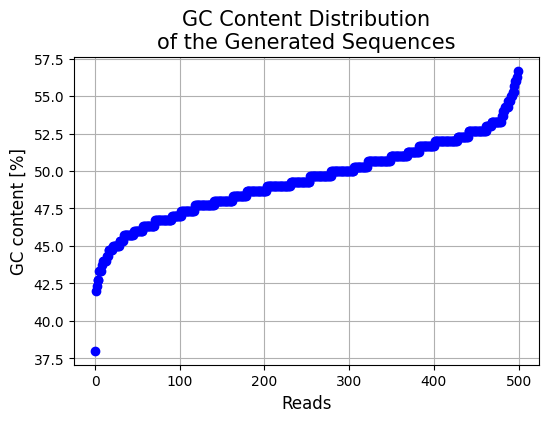

In [7]:
gc_list = gc_cont_like_gpt_code(reads)
plot_GC_content(sorted(gc_list), 'GC Content Distribution\nof the Generated Sequences',# \n min={min(gc_list)}%   max={max(gc_list)}%',
               figname='figures/reads_vs_gc_content.pdf')         # min=38.0%   max=56.7%

The first two most incorrect reads:


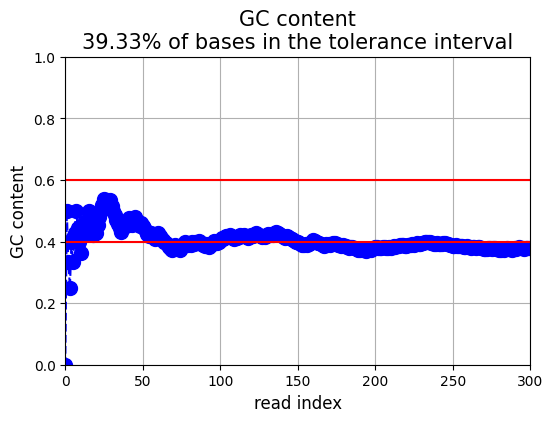

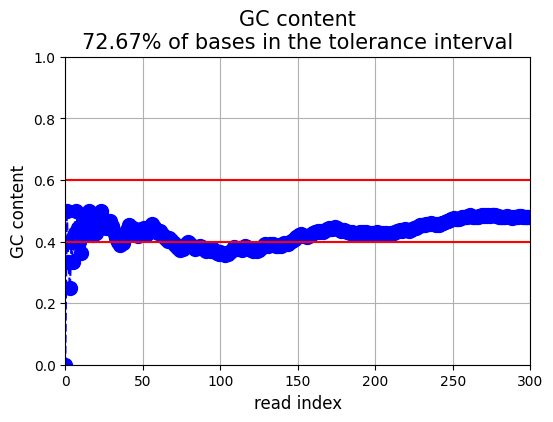

In [8]:
print('The first two most incorrect reads:')
for i in [0,1]:
    plot_gc_ratio_for_a_read(gc_content_in_reads[i], pct_in_tol_intervall[i], 
                            figname=f'figures/gc_content_worst_{i+1}.pdf')

The first two best reads:


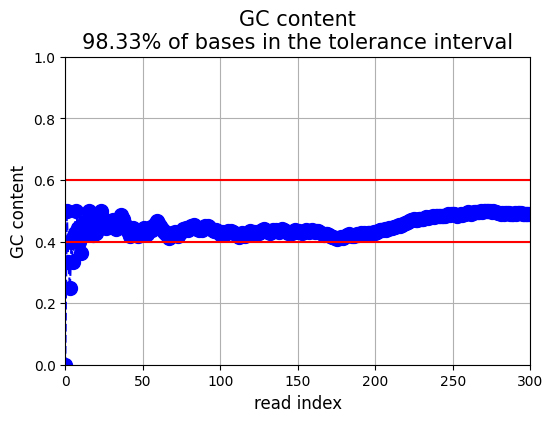

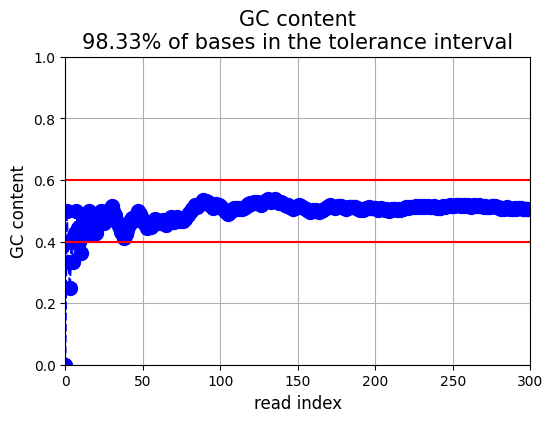

In [9]:
print('The first two best reads:')
for i in [1,2]: 
    plot_gc_ratio_for_a_read(gc_content_in_reads[-i], pct_in_tol_intervall[-i],
                            figname=f'figures/gc_content_best_{i}.pdf')